## Paper Stream

by: Tran Dang An

This is an Introduction of how to use math in computer vision and complete some basic implementation in python code.

I chose this part because it very easy to implement without any knowledge in Deep Learning or Machine Learning, just all math. I belive this can change the view in the way how you focus on AI or Data.

## Import important lib

In [1]:
import numpy
import matplotlib.pyplot as plt
import cv2

Image I copy in Google.

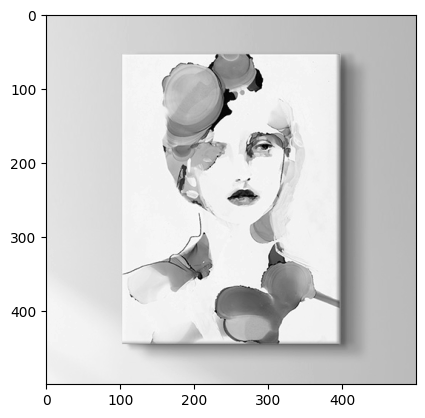

In [2]:
img = cv2.imread('art.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.show()

In the begining, we want to have some module that can change the perspective of the image. This can be done by using derivative in math and some basic knowledge in matrix.

The Ideal in this situation is create a function f(x) that reflect every single pixel in the image into another perspective. With f(x) is the image in new perspective and x is the image. To do this, we need to have 4 points of true image (image without change perspective), and 4 corner of new perspective.

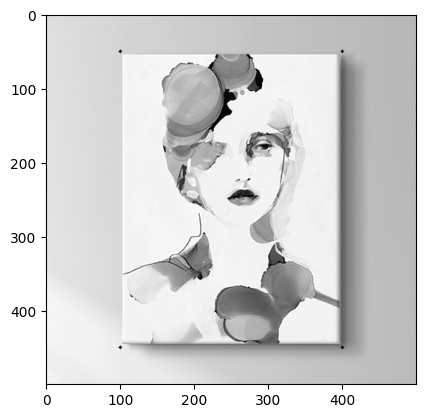

In [3]:
points = [[100, 50], [400, 50], [100, 450], [400, 450]]
check_img = img.copy()
for point in points:
    check_img = cv2.rectangle(check_img, 
                              (point[0], point[1]), 
                              (point[0], point[1]), 
                              thickness=4, 
                              color=(0, 0, 0)
                             )
plt.imshow(check_img, cmap='gray')
plt.show()

In [4]:
points = numpy.array(points)
new_points = numpy.array([[0, 0], 
                          [200, 0], 
                          [0, 300], 
                          [200, 300]])

In [5]:
#using derivative for finding f(x)
#f is an linear function -> f(x) = ax + b., g is an linear function -> g(y) = my + n.
#define W1 = [a, b], X = [x, 1] -> f(x) = W1@X
#define W2 = [m, n], Y = [y, 1] -> g(y) = W2@X
#find W1
X = numpy.array([[val[0], 1] for val in points])
Y = numpy.array([[val[1], 1] for val in points])

NP1 = numpy.array([[val[0]] for val in new_points])
NP2 = numpy.array([[val[1]] for val in new_points])

W1 = numpy.linalg.pinv(X.T@X)@X.T@NP1
W2 = numpy.linalg.pinv(Y.T@Y)@Y.T@NP2

In [6]:
h, w = img.shape
new_x = []
new_y = []
for x in range(w):
    new_x.append(x*W1[0] + W1[1])
for y in range(h):
    new_y.append(y*W2[0] + W2[1])

new_x, new_y = numpy.array(new_x), numpy.array(new_y)
new_x, new_y = numpy.round(new_x), numpy.round(new_y)

max_x = (new_x[-1] - new_x[0] + 1).astype(int)[0]
max_y = (new_y[-1] - new_y[0] + 1).astype(int)[0]

min_x = new_x[0].copy()
min_y = new_y[0].copy()

In [7]:
min(new_x), max(new_x)

(array([-67.]), array([266.]))

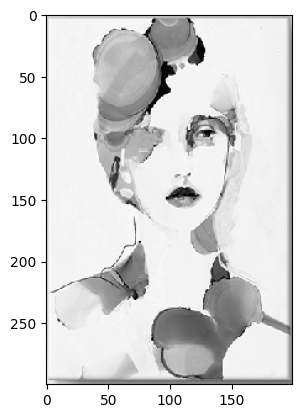

In [8]:
new_image = numpy.zeros((max_y + 1, max_x + 1), dtype=numpy.int64)
for i in range(len(new_x)):
    for j in range(len(new_y)):
        color = img[j, i]
        x, y = new_x[i].astype(int)[0], new_y[j].astype(int)[0]
        new_image[y, x] = color

new_image = new_image[:new_points[-1, 1], :new_points[-1, 0]]
plt.imshow(new_image, cmap='gray')
plt.show()